In [2]:
import datacube
# To access and work with available data

import numpy as np
import pandas as pd
# To format tables

from odc.ui import DcViewer 
# Provides an interface for interactively exploring the products available in the datacube

from odc.ui import with_ui_cbk
# Enables a progress bar when loading large amounts of data.

import xarray as xr

import matplotlib.pyplot as plt

# Set config for displaying tables nicely
# !! USEFUL !! otherwise parts of longer infos won't be displayed in tables
pd.set_option("display.max_colwidth", 200)
pd.set_option("display.max_rows", None)

# Connect to DataCube
# argument "app" --- user defined name for a session (e.g. choose one matching the purpose of this notebook)
dc = datacube.Datacube(app = "nb_understand_ndArrays", config = '/home/datacube/.datacube.conf')

In [3]:
# Load Data
ds = dc.load(product = "s2_l2a_bavaria",
             measurements = ["blue", "green","red", "red_edge2", "nir", "narrow_nir"],
             longitude = [12.493, 12.509],
             latitude = [47.861, 47.868],
             time = ("2020-04-01", "2021-03-31"))

print(ds)

<xarray.Dataset>
Dimensions:      (time: 360, x: 124, y: 84)
Coordinates:
  * time         (time) datetime64[ns] 2020-04-01T10:27:13 ... 2021-03-29T10:...
  * y            (y) float64 5.308e+06 5.308e+06 ... 5.307e+06 5.307e+06
  * x            (x) float64 7.612e+05 7.612e+05 ... 7.624e+05 7.624e+05
    spatial_ref  int32 25832
Data variables:
    blue         (time, y, x) int16 0 0 0 0 0 0 0 ... 586 572 569 543 569 565
    green        (time, y, x) int16 0 0 0 0 0 0 0 ... 872 819 819 808 801 810
    red          (time, y, x) int16 0 0 0 0 0 0 0 ... 608 602 609 602 617 628
    red_edge2    (time, y, x) int16 0 0 0 0 0 0 0 ... 247 237 237 241 241 231
    nir          (time, y, x) int16 0 0 0 0 0 0 0 ... 245 244 243 240 235 239
    narrow_nir   (time, y, x) int16 0 0 0 0 0 0 0 ... 203 199 199 198 198 203
Attributes:
    crs:           EPSG:25832
    grid_mapping:  spatial_ref


In [4]:
# Group by month, Mean
ds_mmean = ds.groupby('time.month').mean(dim='time')
print(ds_mmean)

<xarray.Dataset>
Dimensions:      (month: 12, x: 124, y: 84)
Coordinates:
  * y            (y) float64 5.308e+06 5.308e+06 ... 5.307e+06 5.307e+06
  * x            (x) float64 7.612e+05 7.612e+05 ... 7.624e+05 7.624e+05
    spatial_ref  int32 25832
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    blue         (month, y, x) float64 2.61e+03 2.62e+03 ... 2.14e+03 2.127e+03
    green        (month, y, x) float64 2.492e+03 2.514e+03 ... 2.034e+03
    red          (month, y, x) float64 2.467e+03 2.474e+03 ... 1.947e+03
    red_edge2    (month, y, x) float64 2.442e+03 2.452e+03 ... 1.881e+03
    nir          (month, y, x) float64 2.494e+03 2.509e+03 ... 1.947e+03
    narrow_nir   (month, y, x) float64 2.343e+03 2.346e+03 ... 1.806e+03


In [6]:
# Tesseled Cap Wetness
wet = 0.1509*ds_mmean.blue + 0.1973*ds_mmean.green + 0.3279*ds_mmean.red + 0.3406*ds_mmean.nir-0.711211-0.457212
# Tesseled Cap Green Vegetation
gvi = -0.2848*ds_mmean.blue-0.2435*ds_mmean.green-0.5436*ds_mmean.red + 0.7243*ds_mmean.nir + 0.084011-0.180012
# Tesseled Cap Soil Brightness
sbi = 0.332*ds_mmean.green + 0.603*ds_mmean.red + 0.675*ds_mmean.red_edge2 + 0.262*ds_mmean.narrow_nir

In [7]:
ds_mmean['wet']=wet
ds_mmean['gvi']=gvi
ds_mmean['sbi']=sbi
print(ds_mmean)

<xarray.Dataset>
Dimensions:      (month: 12, x: 124, y: 84)
Coordinates:
  * y            (y) float64 5.308e+06 5.308e+06 ... 5.307e+06 5.307e+06
  * x            (x) float64 7.612e+05 7.612e+05 ... 7.624e+05 7.624e+05
    spatial_ref  int32 25832
  * month        (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    blue         (month, y, x) float64 2.61e+03 2.62e+03 ... 2.14e+03 2.127e+03
    green        (month, y, x) float64 2.492e+03 2.514e+03 ... 2.034e+03
    red          (month, y, x) float64 2.467e+03 2.474e+03 ... 1.947e+03
    red_edge2    (month, y, x) float64 2.442e+03 2.452e+03 ... 1.881e+03
    nir          (month, y, x) float64 2.494e+03 2.509e+03 ... 1.947e+03
    narrow_nir   (month, y, x) float64 2.343e+03 2.346e+03 ... 1.806e+03
    wet          (month, y, x) float64 2.543e+03 2.556e+03 ... 2.023e+03
    gvi          (month, y, x) float64 -884.7 -885.9 -894.6 ... -757.3 -749.5
    sbi          (month, y, x) float64 4.578e+03 4.596e+03 ... 3.592e+03


In [15]:
ds_mmean.gvi.max()

<xarray.DataArray 'gvi' ()>
array(1185.768824)
Coordinates:
    spatial_ref  int32 25832

Text(0.5, 1.02, 'Monthly Mean')

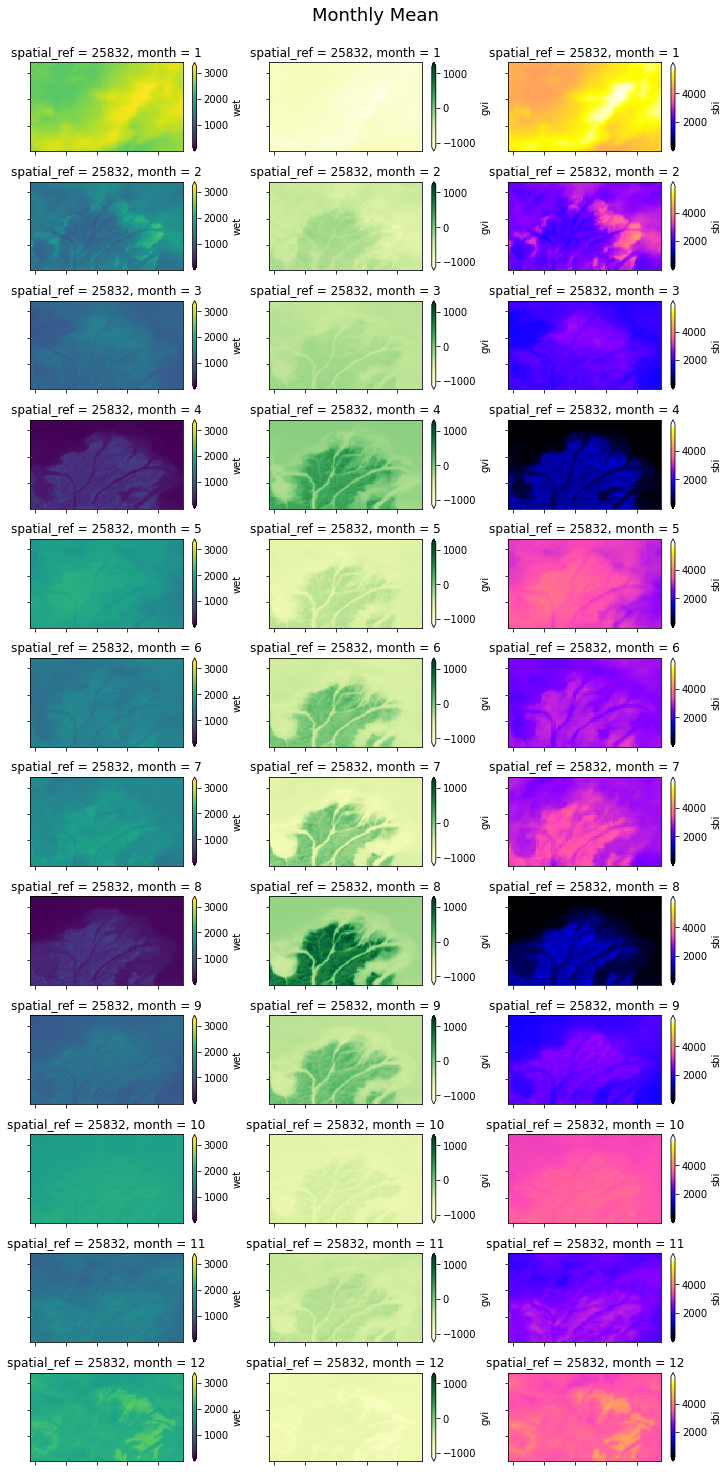

In [23]:
# Plot the show the results
notnull = pd.notnull(ds_mmean['red'])[0]
mylist = [1,2,3,4,5,6,7,8,9,10,11,12]

fig, axes = plt.subplots(nrows=12, ncols=3, figsize=(10,20))
for i, mon in enumerate(mylist):
    ds_mmean['wet'].sel(month=mon).where(notnull).plot.pcolormesh(
        ax=axes[i,0], vmin=130, vmax=3250, cmap='viridis',
        add_colorbar=True, extend='both')
    
    ds_mmean['gvi'].sel(month=mon).where(notnull).plot.pcolormesh(
        ax=axes[i,1], vmin=-1130, vmax=1200, cmap='YlGn',
        add_colorbar=True, extend='both')
    
    ds_mmean['sbi'].sel(month=mon).where(notnull).plot.pcolormesh(
        ax=axes[i,2], vmin=220, vmax=5900, cmap='gnuplot2',
        add_colorbar=True, extend='both')
    
    axes[i,0].set_ylabel('')
    axes[i,1].set_ylabel('')
    axes[i,2].set_ylabel('')
    
for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis('tight')
    ax.set_xlabel('')
    
#axes[0,0].set_title('Season Sum, Red')
#axes[0,1].set_title('Season Sum, Nir')
#axes[0,2].set_title('Season Sum, NDVI')

plt.tight_layout()

fig.suptitle('Monthly Mean', fontsize=18, y=1.02)

### Supported cmap
* 'Accent', 'Accent_r', 
* 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 
* 'CMRmap', 'CMRmap_r', 
* 'Dark2', 'Dark2_r', 
* 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 
* 'Greys', 'Greys_r', 
* 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 
* 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 
* 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
* 'PiYG', 'PiYG_r', 
* 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
* 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
* 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 
* 'Spectral', 'Spectral_r', 
* 'Wistia', 'Wistia_r', 
* 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 
* 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 
* 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 
* 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 
* 'flag', 'flag_r', 
* 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
* 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 
* 'gray', 'gray_r', 
* 'hot', 'hot_r', 'hsv', 'hsv_r', 
* 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 
* 'ocean', 'ocean_r', 
* 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 
* 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 
* 'spring', 'spring_r', 'summer', 'summer_r', 
* 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 
* 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 
* 'viridis', 'viridis_r', 'winter', 'winter_r'